In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('./Titanic.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
cols_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']

In [5]:
data = data.drop(columns = cols_drop)

In [6]:
data.head()
pd.unique(data['Embarked'])


array(['S', 'C', 'Q', nan], dtype=object)

In [7]:
lab_enc = LabelEncoder()
data['Sex'] = lab_enc.fit_transform(data['Sex'])
data['Embarked'] = lab_enc.fit_transform(data['Embarked'])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [8]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [9]:
data = data.fillna(data['Age'].mean())

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [37]:
input_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
output_col = ['Survived']
input_cols



['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [12]:
X_data = data[input_cols]
Y_data = data['Survived']
X_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [13]:
Y_data.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [14]:
print(X_data.shape, Y_data.shape)

(891, 7) (891,)


In [15]:
X_data = X_data.values
Y_data = Y_data.values

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X_data,Y_data,train_size = 0.8)

In [17]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [18]:
clf = LogisticRegression()
clf.fit(x_train,y_train)
clf.coef_

array([[-0.87710169, -1.26517618, -0.46841027, -0.30764108, -0.04653375,
         0.10975373, -0.17651035]])

In [19]:
clf.intercept_

array([-0.45992401])

In [20]:
accuracy_score(y_train,clf.predict(x_train))

0.7963483146067416

In [21]:
accuracy_score(y_test,clf.predict(x_test))

0.7932960893854749

In [22]:
xt = np.array([[1,0,18,6,0,100,0]])
xt = scale.transform(xt)
xt

array([[-1.52473584, -1.35941164, -0.87466722,  4.96544391, -0.47097568,
         1.39341232, -1.89405673]])

In [23]:
clf.predict(xt)

array([1])

In [24]:
from sklearn.metrics import confusion_matrix, classification_report,roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
ypred = [1,1,0,0,0,1,0,1,1,1]
yac = [1,0,0,0,1,1,0,1,0,1]

In [26]:
cm = confusion_matrix(yac,ypred)

<Axes: >

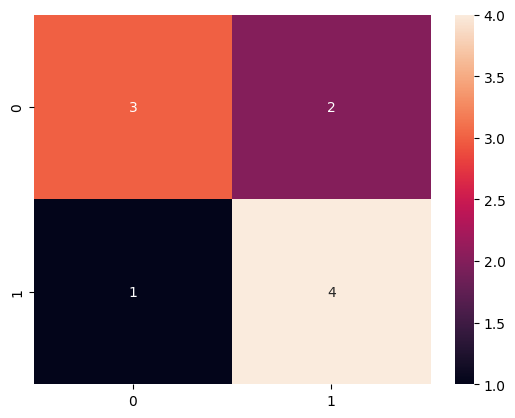

In [27]:
sns.heatmap(cm,annot=True)

<Axes: >

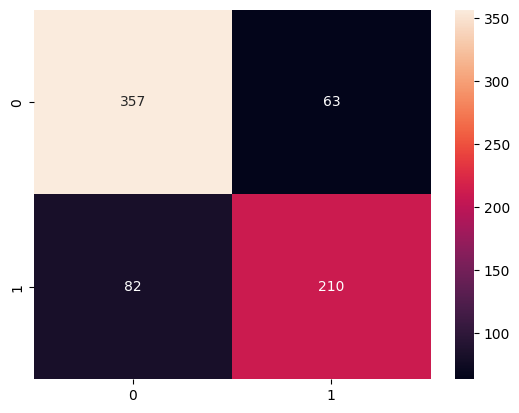

In [28]:
sns.heatmap(confusion_matrix(y_train,clf.predict(x_train)),annot = True,fmt='g')

In [29]:
print(classification_report(yac,ypred))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.67      0.80      0.73         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10



In [30]:
print(classification_report(y_train,clf.predict(x_train)))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       420
           1       0.77      0.72      0.74       292

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.79       712
weighted avg       0.80      0.80      0.80       712



In [31]:
fpr,tpr,_ = roc_curve(y_train,clf.predict_proba(x_train)[:,0],pos_label=0)

# fpr, tpr, _ = roc_curve(y_train, clf.predict_proba(x_train)[:,0], pos_label=0)
# clf.predict_proba(x_train)[:, 0]:
# This gives the predicted probability that each sample belongs to class 0.

# roc_curve(y_train, ..., pos_label=0):

# Calculates the FPR and TPR at various thresholds.

# pos_label=0 means we are treating class 0 as the positive class (which is a bit unusual — usually 1 is the positive class).

# 📌 Mathematical meaning:

# For multiple thresholds (e.g. 0.1, 0.2, ..., 0.9), it calculates:

# TPR (Recall) = TP / (TP + FN)

# FPR = FP / (FP + TN)



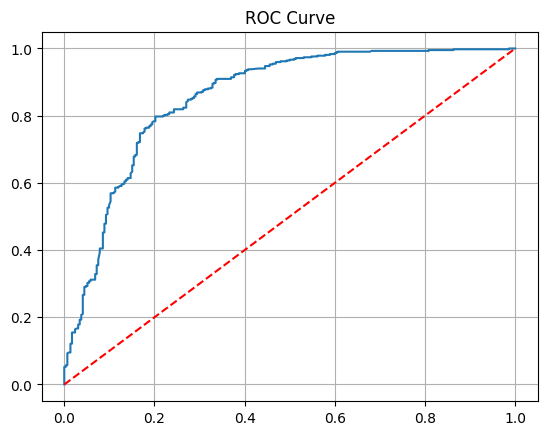

In [32]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.grid()
plt.title('ROC Curve')
plt.show()

# plt.plot([0,1],[0,1],'r--')
# This plots a dashed red diagonal line from (0,0) to (1,1),
#  representing a random classifier — i.e., 50/50 guessing.



In [33]:
clf.predict_proba(x_train)[:,1]

array([0.26372528, 0.43322584, 0.15672148, 0.2996389 , 0.71384935,
       0.90900087, 0.25554254, 0.91328457, 0.11370831, 0.96549143,
       0.38342884, 0.29387314, 0.67952122, 0.96617826, 0.09732285,
       0.64055076, 0.21335874, 0.01268759, 0.12708927, 0.69459082,
       0.79193763, 0.94153834, 0.91000713, 0.11970098, 0.67340607,
       0.12708927, 0.49880045, 0.88899519, 0.13336566, 0.87246542,
       0.04731055, 0.1037899 , 0.13168649, 0.1254493 , 0.23690865,
       0.10409642, 0.93652147, 0.10476224, 0.40860289, 0.37521619,
       0.10473653, 0.40480322, 0.12695571, 0.72068546, 0.67065712,
       0.75763379, 0.68707208, 0.59384965, 0.40181177, 0.13873019,
       0.83927351, 0.06559071, 0.90878692, 0.06462827, 0.87504201,
       0.89024797, 0.66350759, 0.58755029, 0.59608261, 0.79984437,
       0.85393384, 0.22401767, 0.30653887, 0.10476224, 0.64658397,
       0.39964275, 0.95615915, 0.10431362, 0.18368693, 0.15185796,
       0.65370368, 0.11556764, 0.12192505, 0.22433921, 0.13776

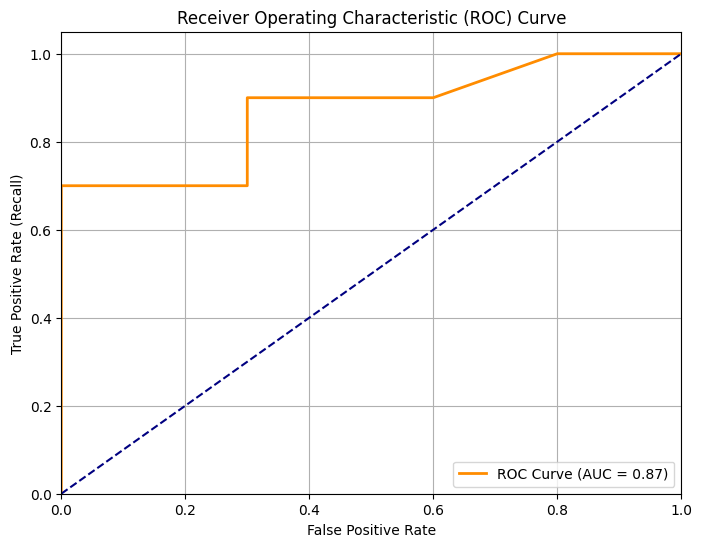

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Same actual and predicted probabilities as before
actual = np.array([
    1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
    1, 1, 0, 1, 0, 0, 1, 1, 0, 0
])

# Instead of hard labels, use prediction **probabilities** (fake example)
# These would normally come from model.predict_proba()[:, 1]
# Here we use random plausible probabilities for illustration:
predicted_prob = np.array([
    0.9, 0.85, 0.4, 0.2, 0.7, 0.8, 0.1, 0.3, 0.2, 0.75,
    0.88, 0.82, 0.3, 0.35, 0.25, 0.1, 0.9, 0.92, 0.2, 0.7
])

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(actual, predicted_prob)

# Compute AUC (Area Under Curve)
auc_score = roc_auc_score(actual, predicted_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', linewidth=2, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
